# Term Deposit Marketing

In [40]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_selection import RFE, RFECV,mutual_info_classif
import numpy as np
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
from sklearn.neighbors import KNeighborsClassifier

## Problem Statement

An European Bank wants to improve the success rate for calls made to customer for their product using machine learning system. For this, our client provided the call center data.  

## Read The Dataset

In [2]:
#Read the CSV File
data_frame=pd.read_csv('..\data\\term-deposit-marketing-2020.csv', encoding = 'unicode_escape', sep=',', header=0)
data_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## Exploratory Data Analysis

In [3]:
# This operation informs the number of rows and columns
data_frame.shape

(40000, 14)

In [4]:
# Look for null data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
# This operation summerize each column 
data_frame.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


## Check each feature distribution

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>, <AxesSubplot:>]],
      dtype=object)

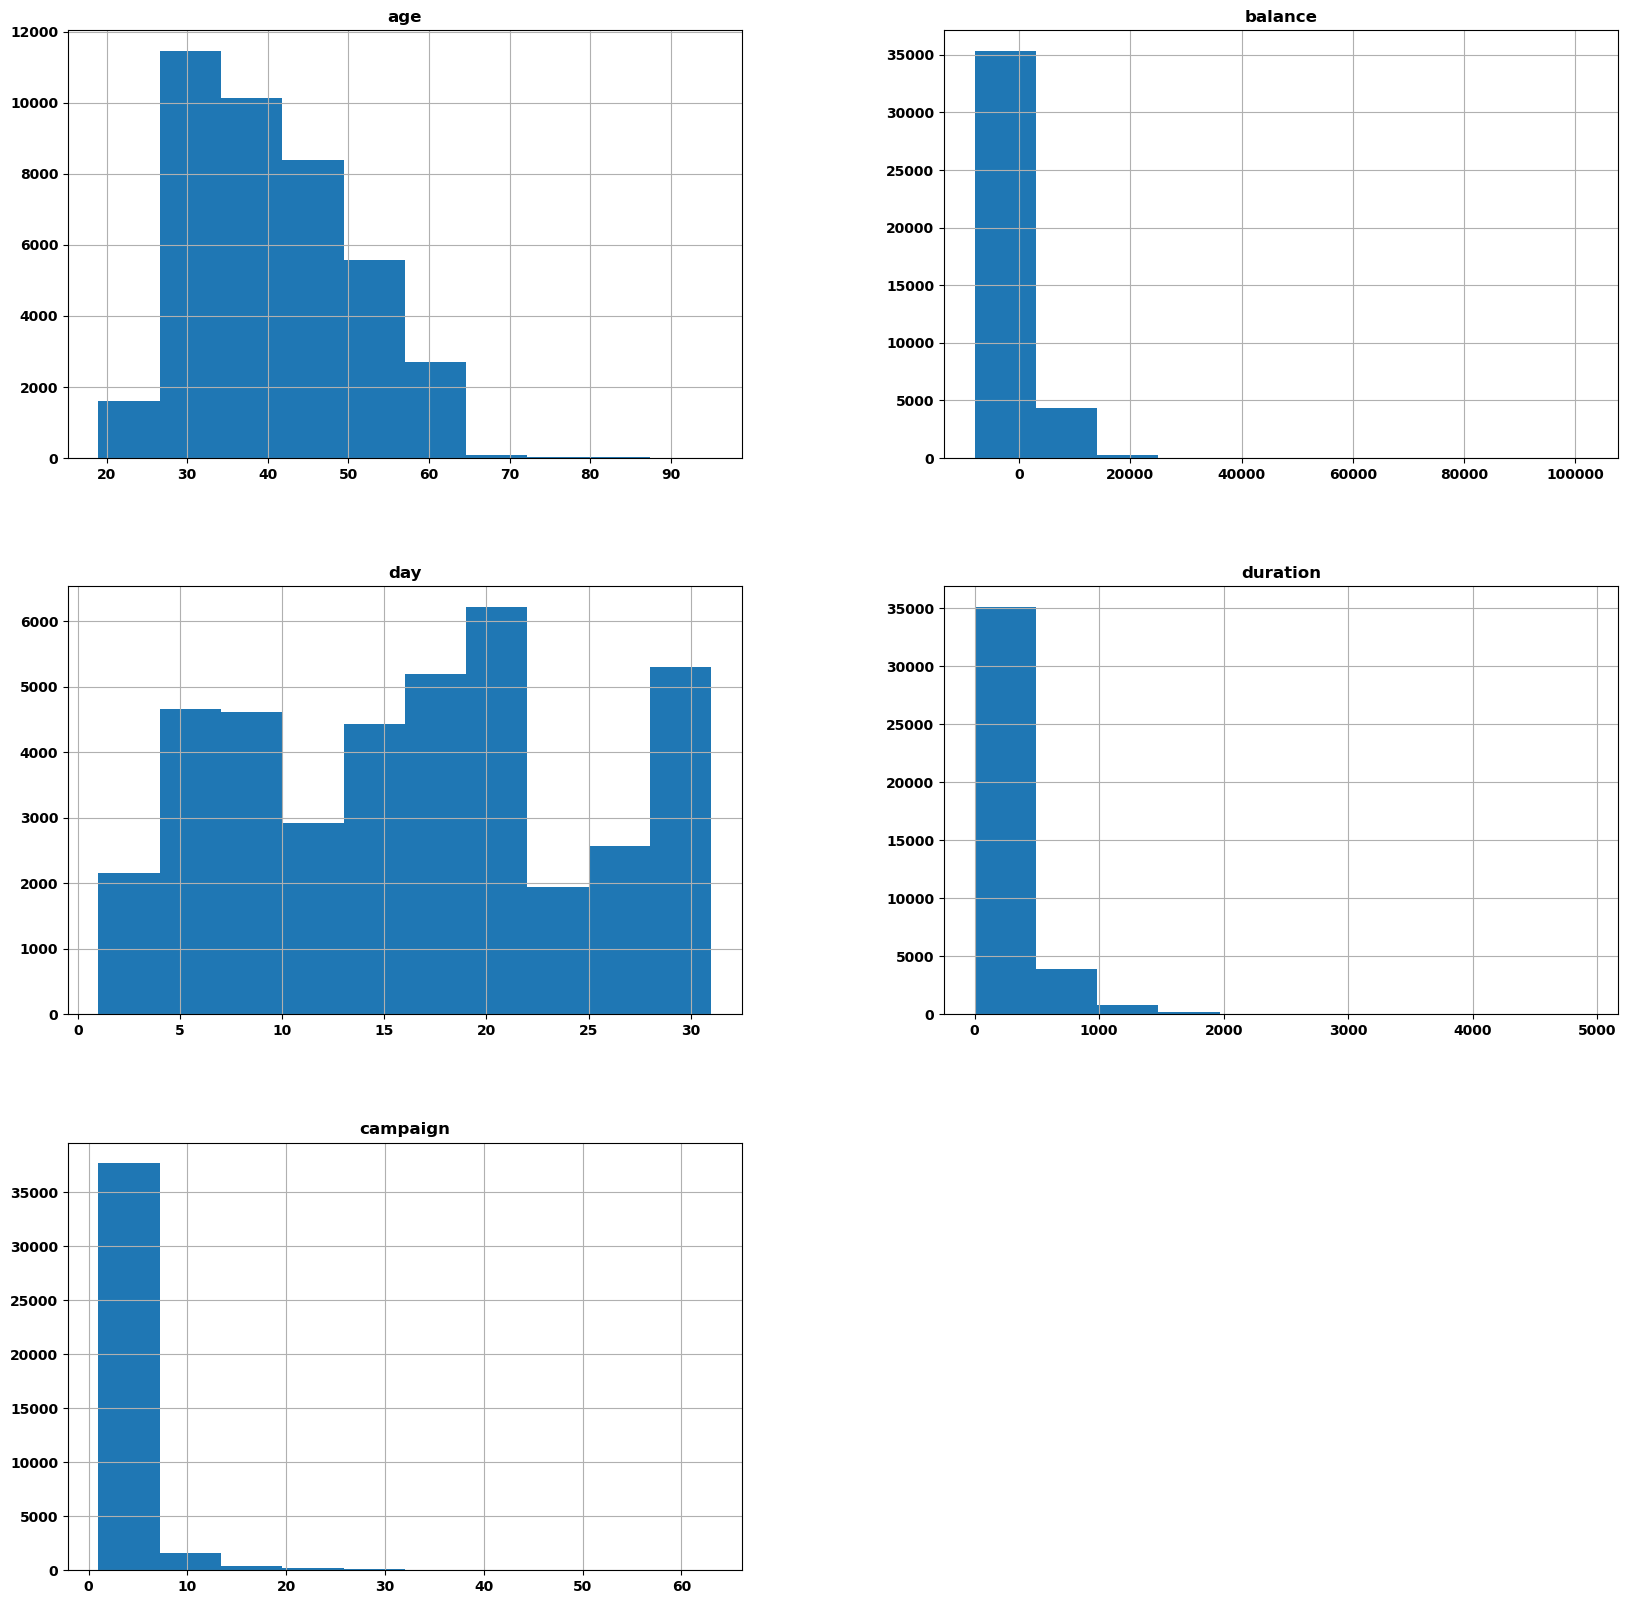

In [6]:
#Check the data distributionin each column.
data_frame.hist (figsize=(20,20))

<AxesSubplot:>

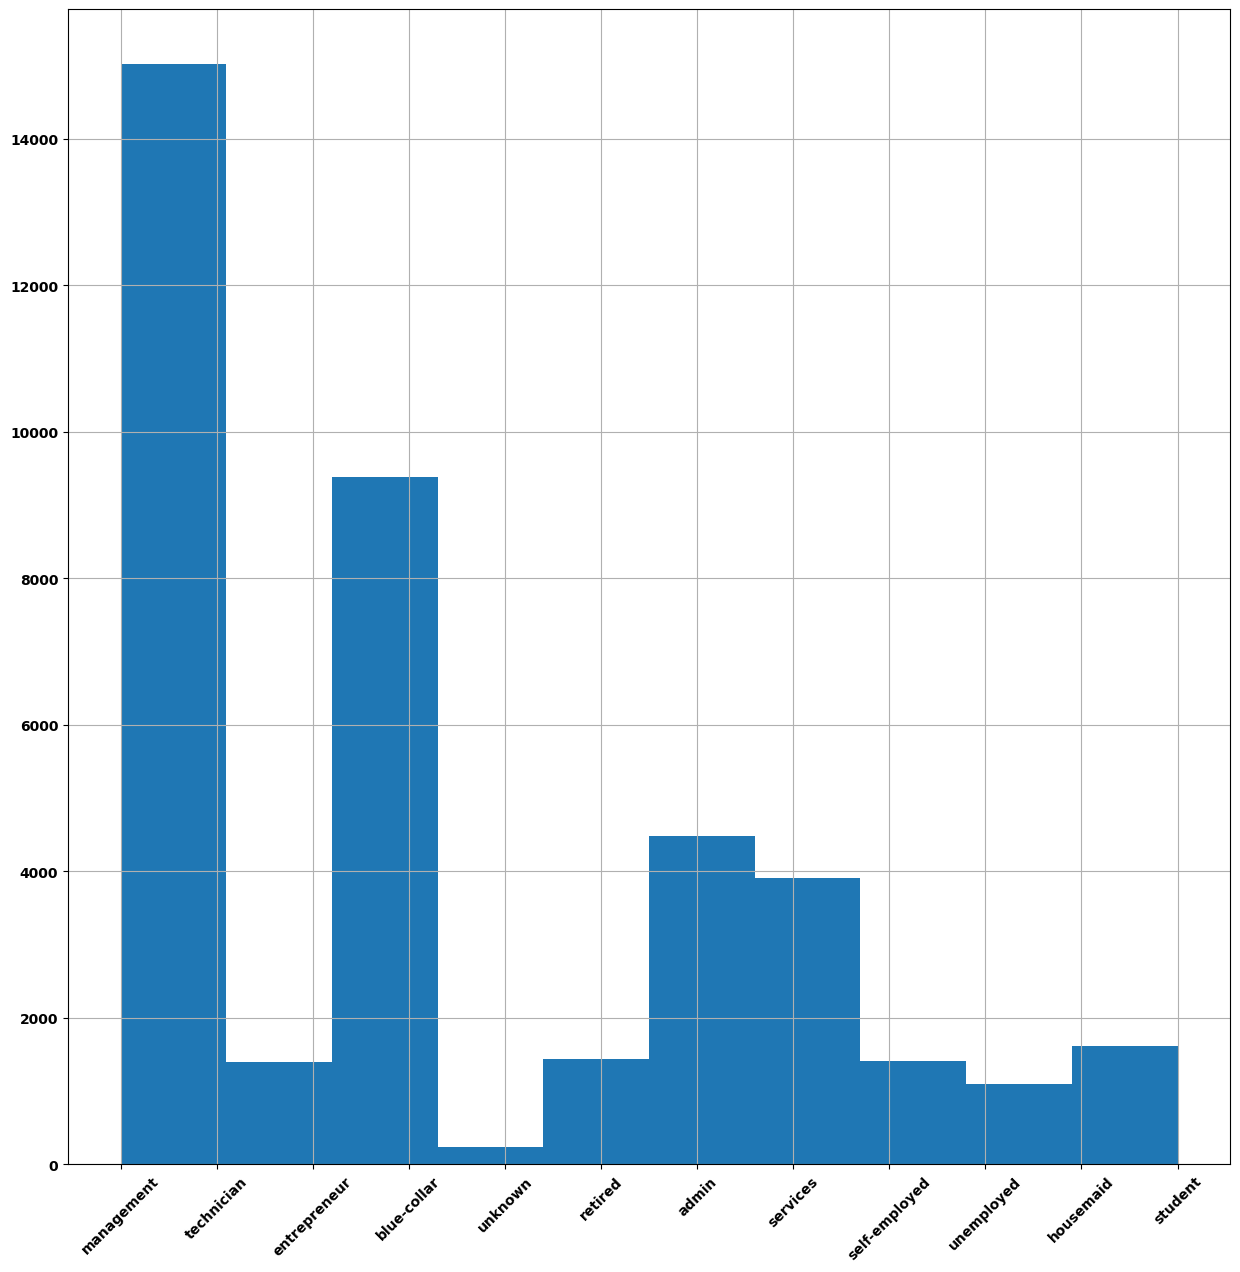

In [7]:
#Check the data distributionin  job column.

data_frame['job'].hist(figsize=(15,15),xrot=45)

<AxesSubplot:>

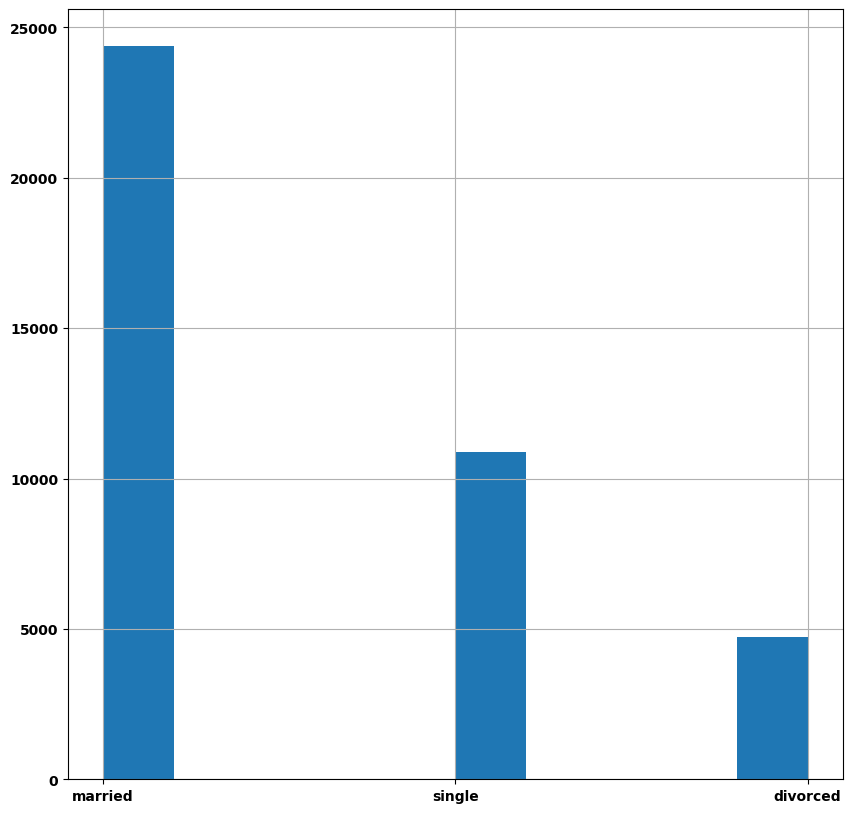

In [8]:
#Check the data distributionin marital column.

data_frame['marital'].hist(figsize=(10,10))

<AxesSubplot:>

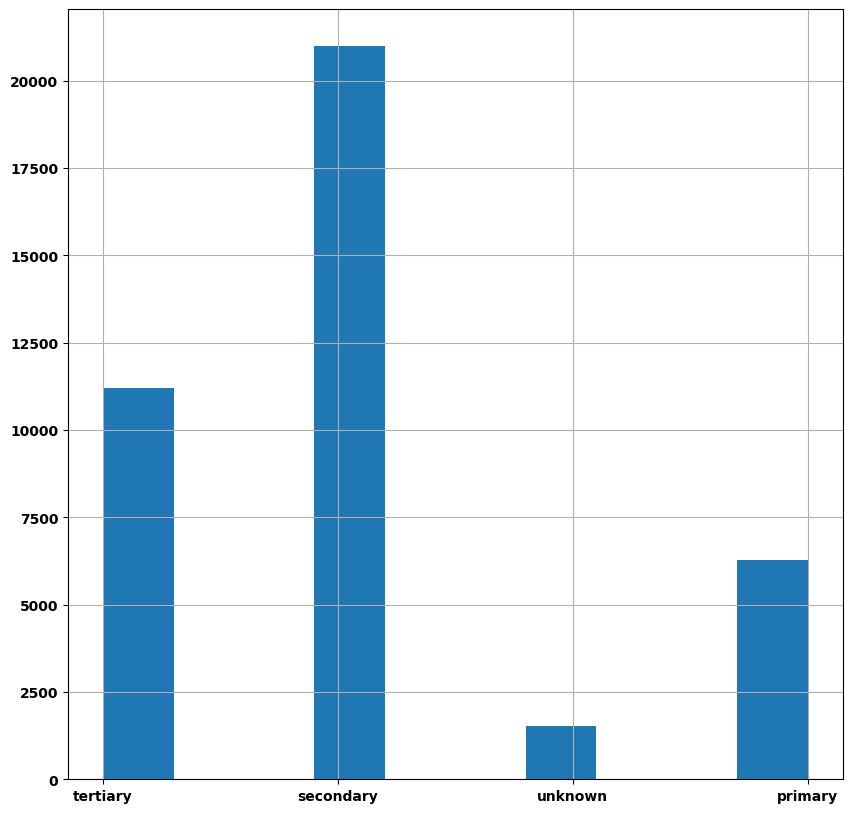

In [9]:
#Check the data distributionin education column.

data_frame['education'].hist(figsize=(10,10))

<AxesSubplot:>

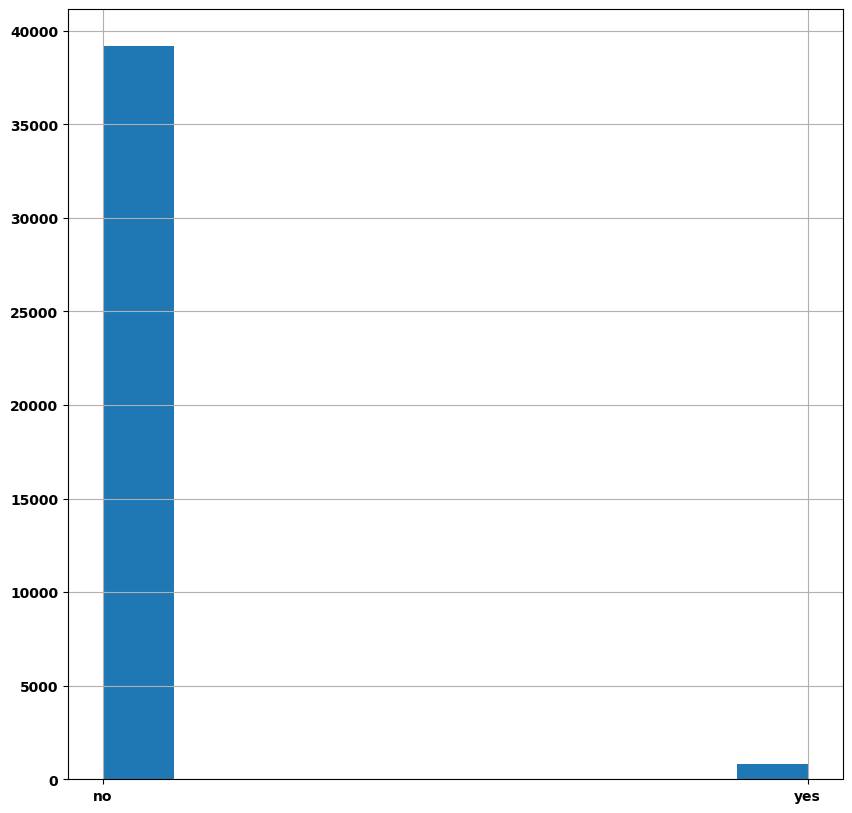

In [10]:
#Check the data distributionin default column.

data_frame['default'].hist(figsize=(10,10))

<AxesSubplot:>

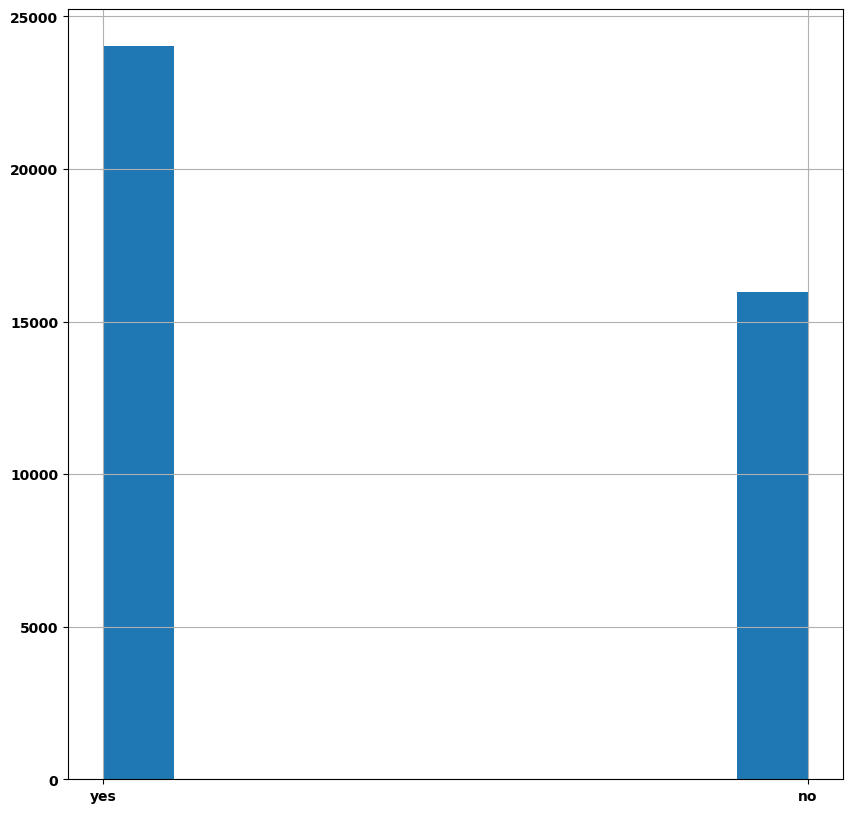

In [11]:
#Check the data distributionin housing column.

data_frame['housing'].hist(figsize=(10,10))

<AxesSubplot:>

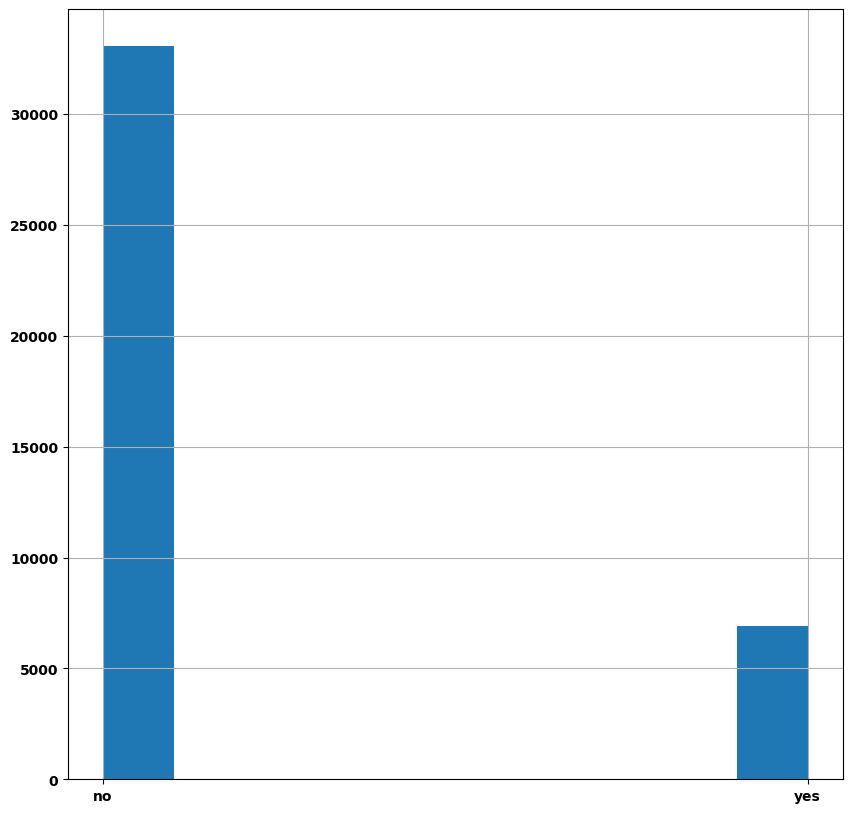

In [12]:
#Check the data distributionin loan column.

data_frame['loan'].hist(figsize=(10,10))

<AxesSubplot:>

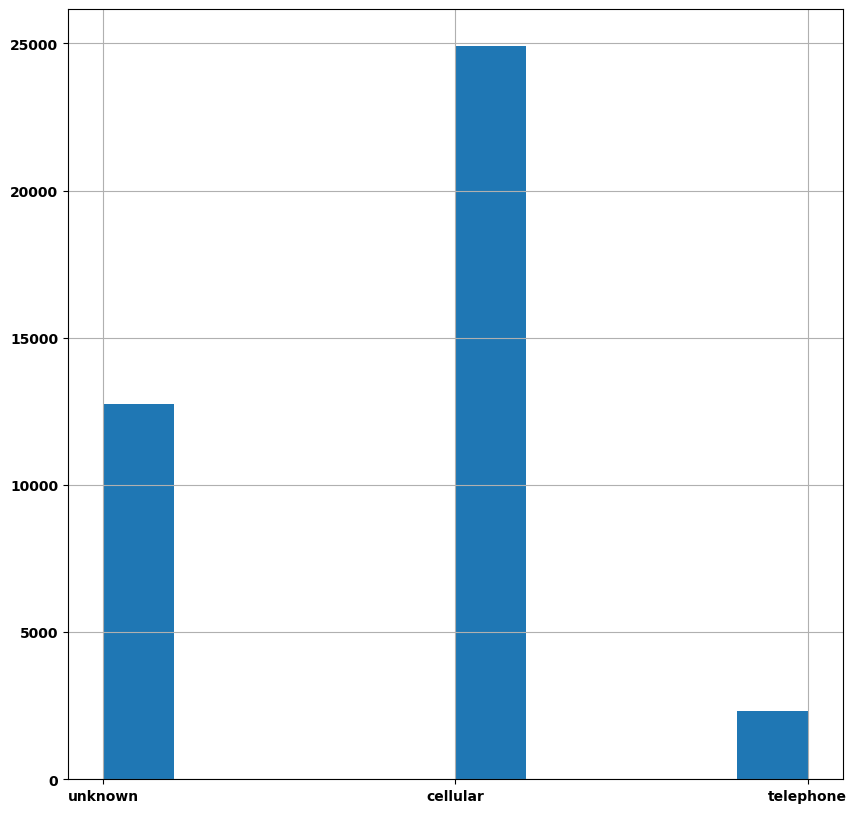

In [13]:
#Check the data distributionin contact column.

data_frame['contact'].hist(figsize=(10,10))

<AxesSubplot:>

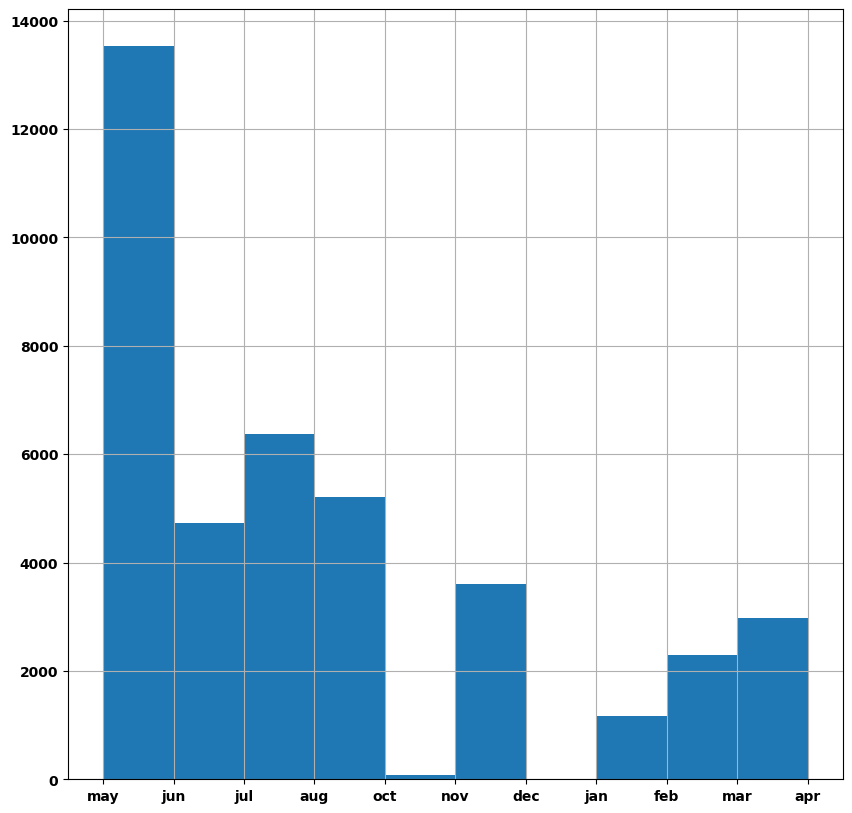

In [14]:
#Check the data distributionin month column.

data_frame['month'].hist(figsize=(10,10))

## Check in detail the relationship of each feature with label

<AxesSubplot:xlabel='y', ylabel='age'>

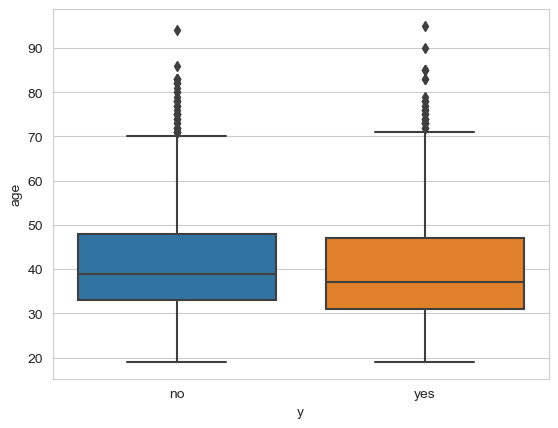

In [15]:
# Check relationship of job with  y 
sb.set_style("whitegrid")
sb.boxplot(x = 'y', y = 'age', data = data_frame)

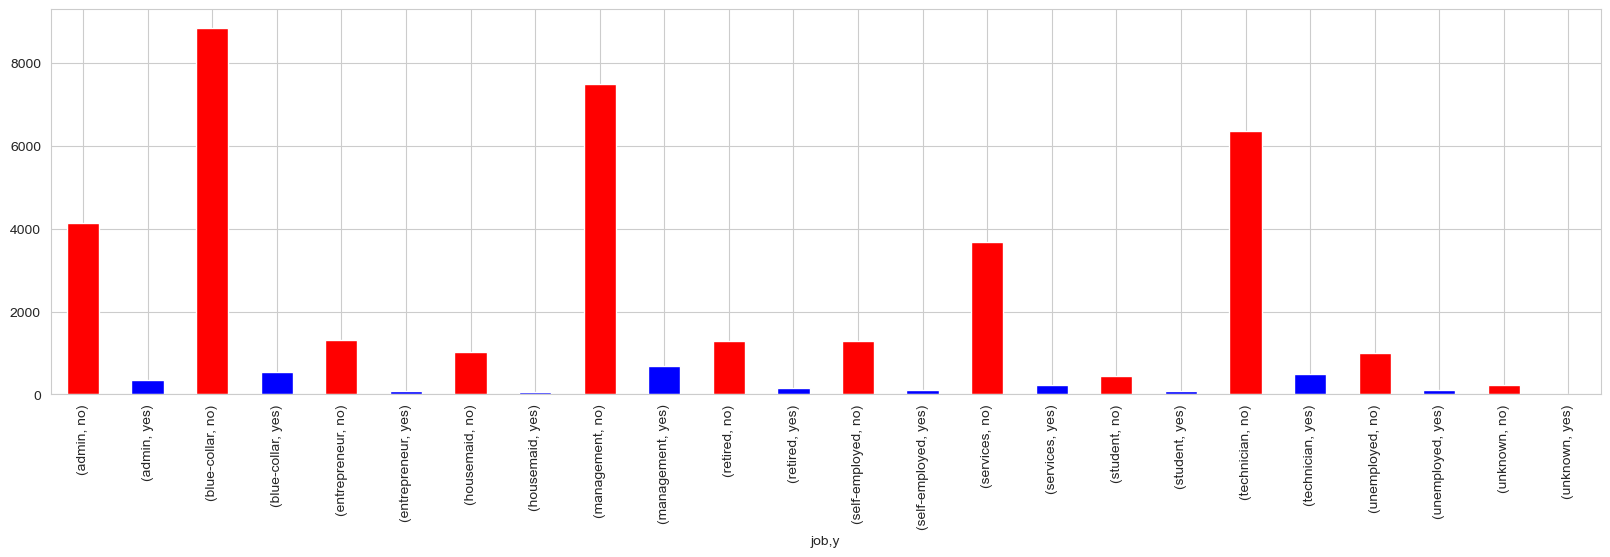

In [16]:
# Check relationship of job with  y 
plt_1 = plt.figure(figsize=(20, 5))
data_frame.groupby(['job','y']).size().plot.bar(color=('r','b'))
plt.show()

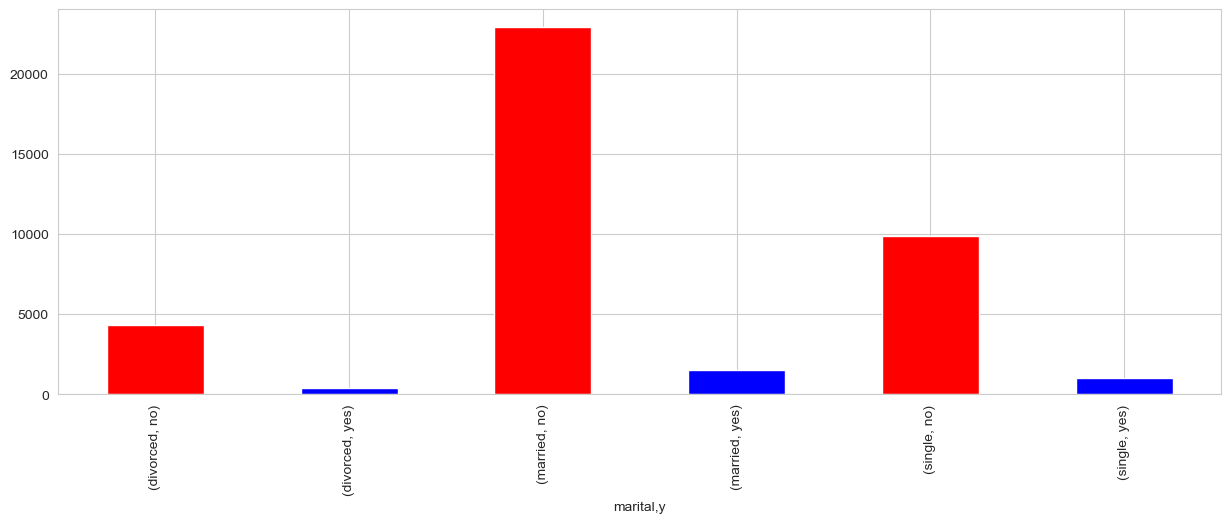

In [17]:
# Check relationship of marital with  y 
plt_1 = plt.figure(figsize=(15, 5))
data_frame.groupby(['marital','y']).size().plot.bar(color=('r','b'))
plt.show()

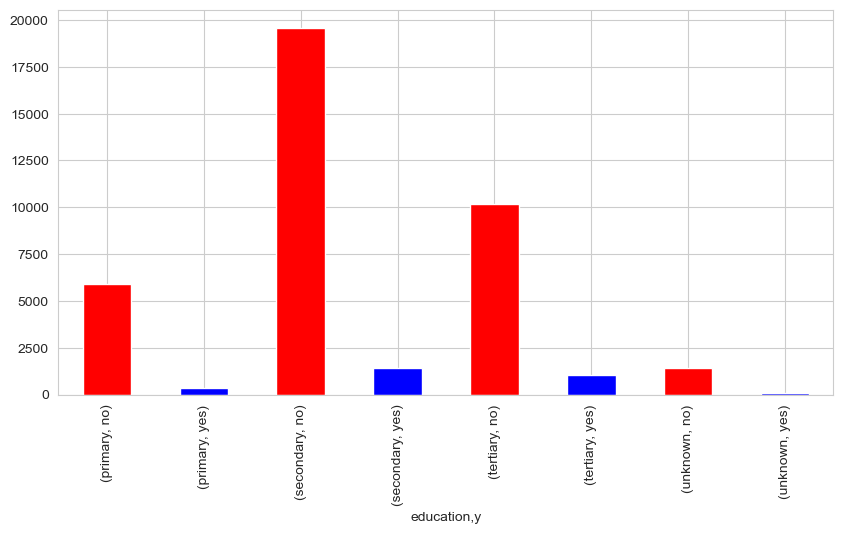

In [18]:
# Check relationship of education with  y 
plt_1 = plt.figure(figsize=(10, 5))
data_frame.groupby(['education','y']).size().plot.bar(color=('r','b'))
plt.show()

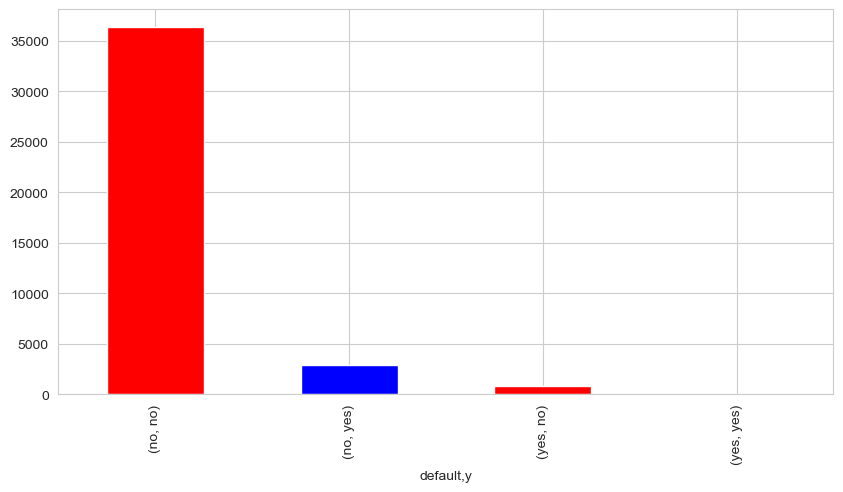

In [19]:
# Check relationship of default with  y 
plt_1 = plt.figure(figsize=(10, 5))
data_frame.groupby(['default','y']).size().plot.bar(color=('r','b'))
plt.show()

<AxesSubplot:xlabel='y', ylabel='balance'>

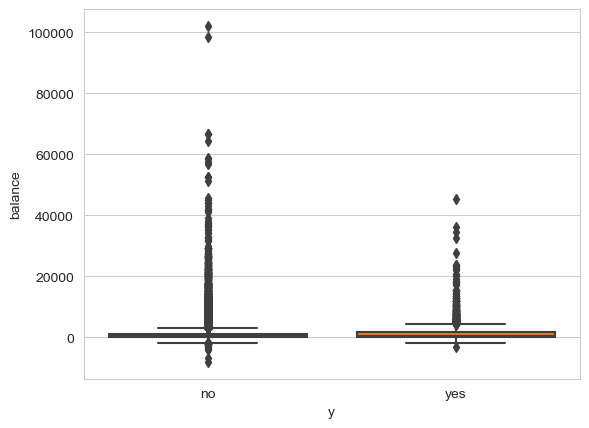

In [20]:
# Check relationship of balance with  y 

sb.set_style("whitegrid")
sb.boxplot(x = 'y', y = 'balance', data = data_frame)

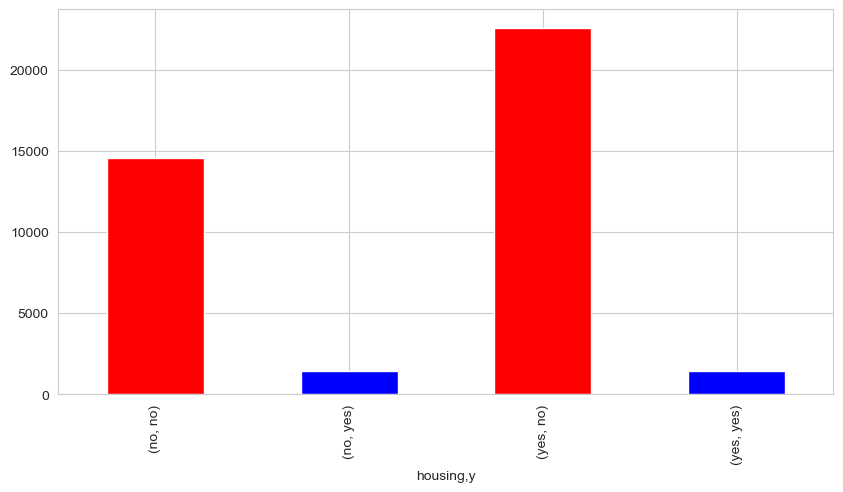

In [21]:
# Check relationship of housing with  y 
plt_1 = plt.figure(figsize=(10, 5))
data_frame.groupby(['housing','y']).size().plot.bar(color=('r','b'))
plt.show()

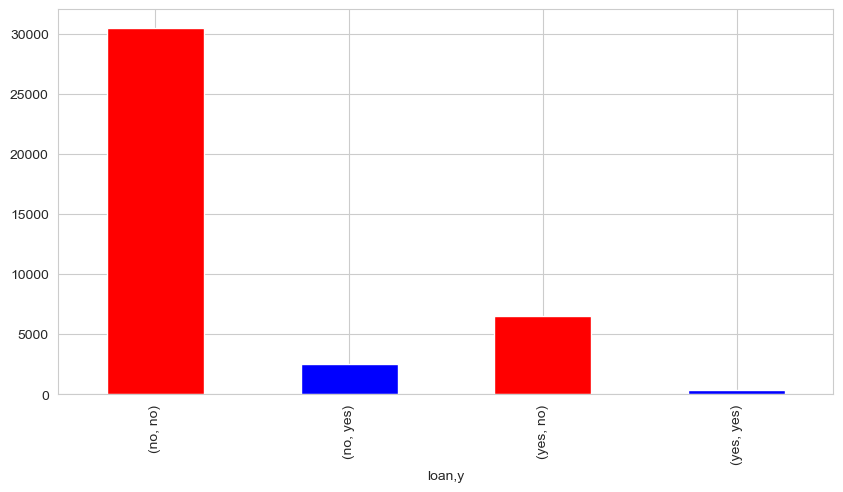

In [22]:
# Check relationship of loan with  target
plt_1 = plt.figure(figsize=(10, 5))
data_frame.groupby(['loan','y']).size().plot.bar(color=('r','b'))
plt.show()

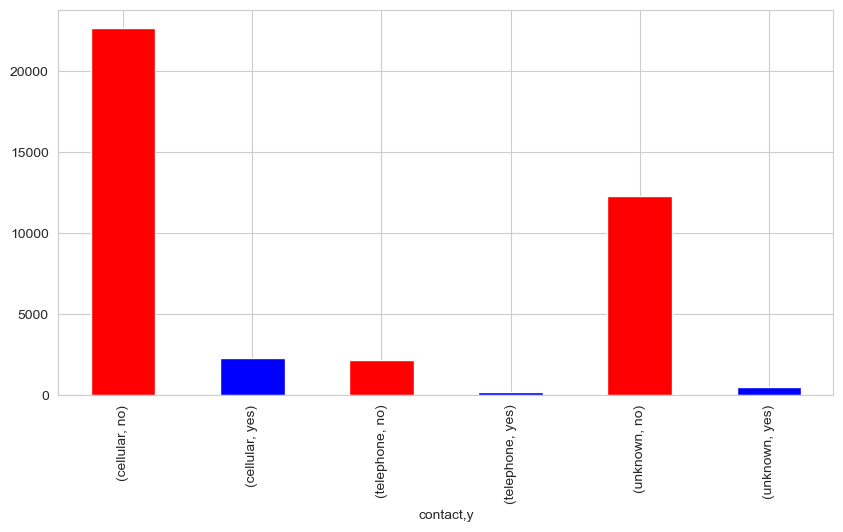

In [23]:
# Check relationship of contact with  y 
plt_1 = plt.figure(figsize=(10, 5))
data_frame.groupby(['contact','y']).size().plot.bar(color=('r','b'))
plt.show()

<AxesSubplot:xlabel='y', ylabel='day'>

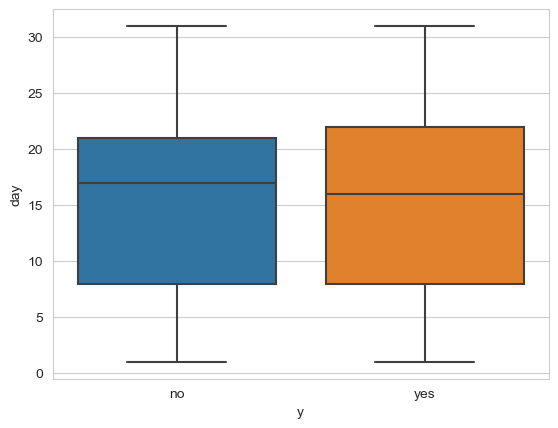

In [24]:
# Check relationship of day with  y 
sb.set_style("whitegrid")
sb.boxplot(x = 'y', y = 'day', data = data_frame)

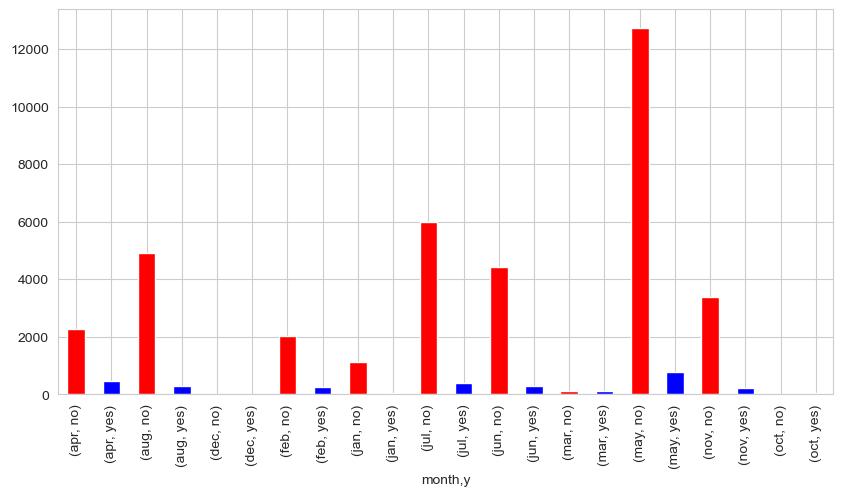

In [25]:
# Check relationship of month with  y 
plt_1 = plt.figure(figsize=(10, 5))
data_frame.groupby(['month','y']).size().plot.bar(color=('r','b'))
plt.show()

<AxesSubplot:xlabel='y', ylabel='campaign'>

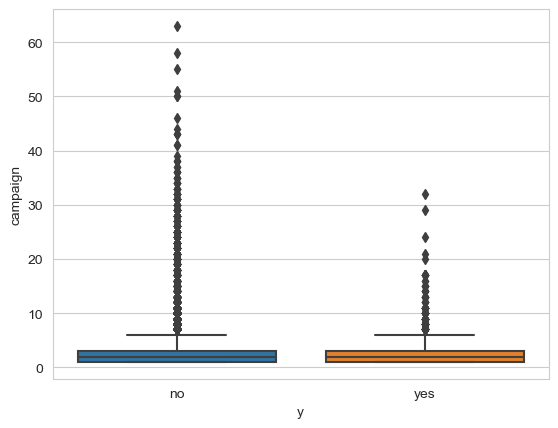

In [26]:
# Check relationship of day with  y 
sb.set_style("whitegrid")
  
sb.boxplot(x = 'y', y = 'campaign', data = data_frame)

In [27]:
# Check for unique values in every feature
features=list(data_frame.columns)
for i in features:
    print(i,":",data_frame[i].unique(),"\n")

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81] 

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital : ['married' 'single' 'divorced'] 

education : ['tertiary' 'secondary' 'unknown' 'primary'] 

default : ['no' 'yes'] 

balance : [  2143     29      2 ...   7222   3402 102127] 

housing : ['yes' 'no'] 

loan : ['no' 'yes'] 

contact : ['unknown' 'cellular' 'telephone'] 

day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] 

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr'] 

duration : [ 261  151   76 ... 1880 1460 2219] 

campaign : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50

### Categorical Data encoding

In [28]:
#convert default, housing, loan and campaign data to numerical data
data_frame.replace({'no':0, 'yes':1}, inplace=True)
data_frame['job'].replace({'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':0, 'retired':5, 'admin':6, 'services':7,'self-employed':8, 'unemployed':9, 'housemaid':10, 'student':11}, inplace=True)
data_frame['month'].replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4}, inplace=True)
data_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,1,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0
1,44,2,single,secondary,0,29,1,0,unknown,5,5,151,1,0
2,33,3,married,secondary,0,2,1,1,unknown,5,5,76,1,0
3,47,4,married,unknown,0,1506,1,0,unknown,5,5,92,1,0
4,33,0,single,unknown,0,1,0,0,unknown,5,5,198,1,0


In [29]:
#Convert marital column to numerical data
encoded_data = pd.get_dummies(data_frame, columns = ['marital', 'contact','education'])
encoded_data.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,1,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,1,0
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,1,0,0
2,33,3,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,1,0,0
3,47,4,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


After data distribution we can see the target column Y is imbalanced. Lets find out the difference in value count of traget column.

In [30]:
# Check the imbalance of 
term_deposit = len(encoded_data[data_frame['y'] == 1])
no_term_deposit = len(encoded_data[data_frame['y']== 0])
class_distribution_ratio = term_deposit/no_term_deposit
print(encoded_data['y'].value_counts())
print(class_distribution_ratio)

0    37104
1     2896
Name: y, dtype: int64
0.07805088400172489


## Treate the imbalance of dataset

In [61]:
# Function to split features and label

def split_data(data_file):
    y=data_file['y']
    features=data_file.drop(['y'],axis=1)
    return(y,features)

In [62]:

y,training_set = split_data(encoded_data)
undersample = NearMiss(version = 2, n_neighbors = 5)
x,y = undersample.fit_resample(training_set,y)
undersampled_dataframe=pd.concat([pd.DataFrame(y),pd.DataFrame(x)],axis=1)

In [63]:
undersampled_dataframe.shape

(5792, 21)

In [64]:
# Prepare data for testing

y,training_set=split_data(encoded_data)
oversample = SMOTE()
training_set,y =oversample.fit_resample(training_set,y)
oversampled_dataframe=pd.concat([pd.DataFrame(y),pd.DataFrame(training_set)],axis=1)
print(oversampled_dataframe['y'].value_counts())

0    37104
1    37104
Name: y, dtype: int64


## Feature Selection

In [65]:
# Function to split features and label

def split_data(data_file):
    y=data_file['y']
    features=data_file.drop(['y'],axis=1)
    return(y,features)

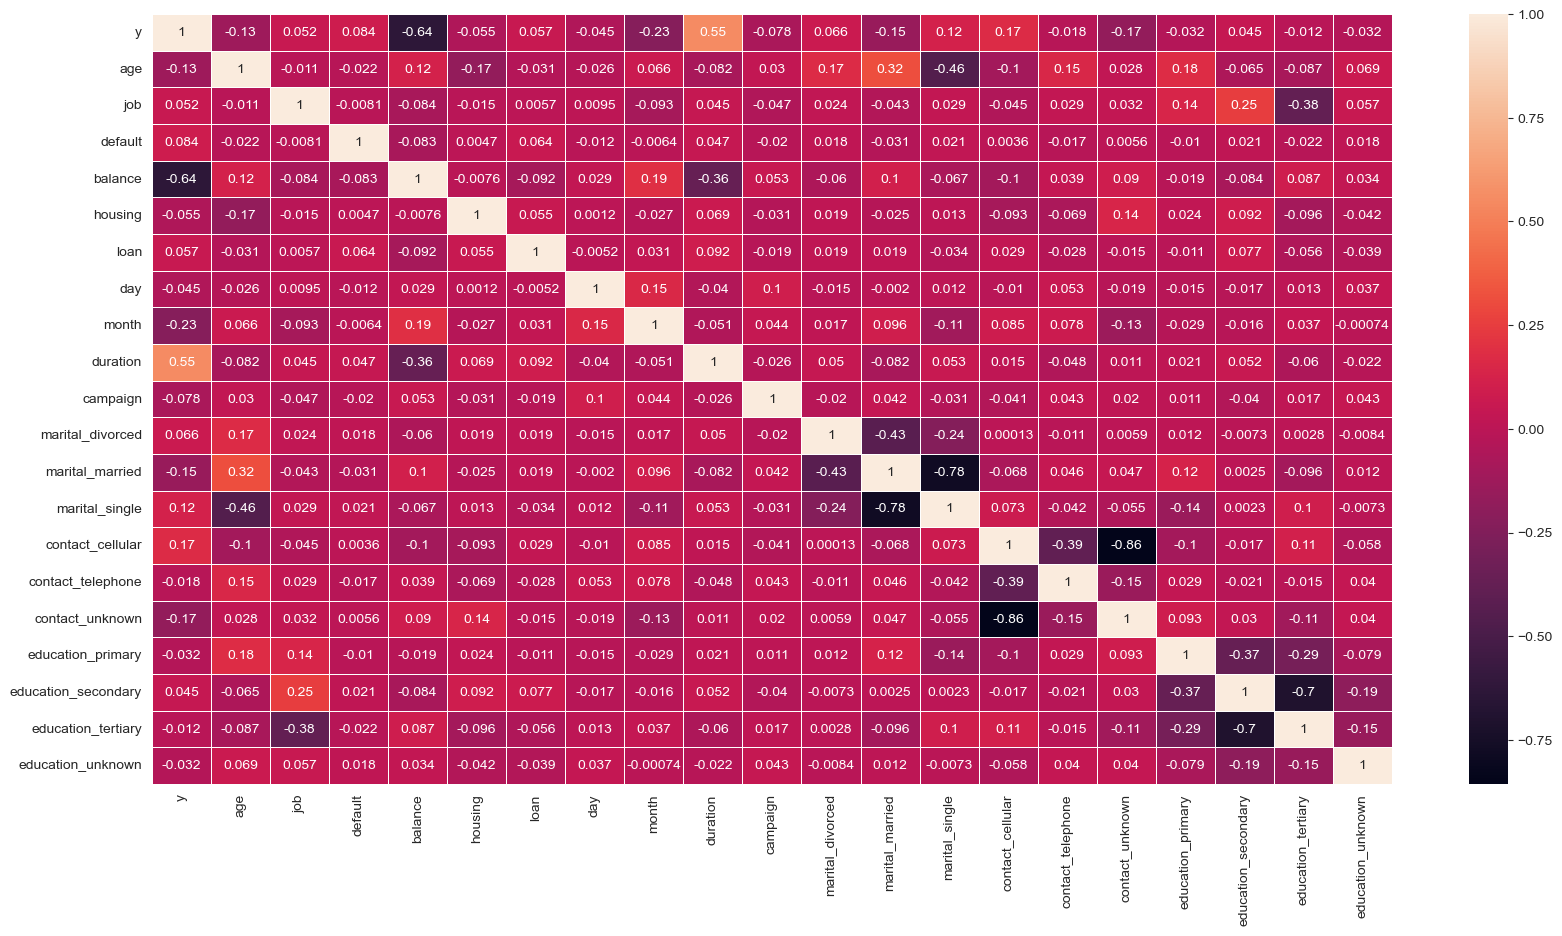

In [66]:
# Find the correlation between traget and features
plt_1 = plt.figure(figsize=(20,10))
sb.heatmap(undersampled_dataframe.corr(),annot=True, linewidth=.5)
plt.show()

In [67]:
y,training_set=split_data(undersampled_dataframe)

estimator = RandomForestClassifier(random_state = 42)
selector = RFE(estimator, n_features_to_select=12, step=1)
selector = selector.fit(training_set, y)
rfe_mask = selector.get_support() #list of booleans for selected features
new_features = [] 
for bool, feature in zip(rfe_mask, training_set.columns):
    if bool:
        new_features.append(feature)
new_features # The list of your 5 best features


['age',
 'job',
 'balance',
 'housing',
 'day',
 'month',
 'duration',
 'campaign',
 'marital_married',
 'contact_cellular',
 'contact_unknown',
 'education_tertiary']

Optimal number of features : 17
Best features : ['age', 'job', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_unknown', 'education_primary', 'education_secondary', 'education_tertiary']


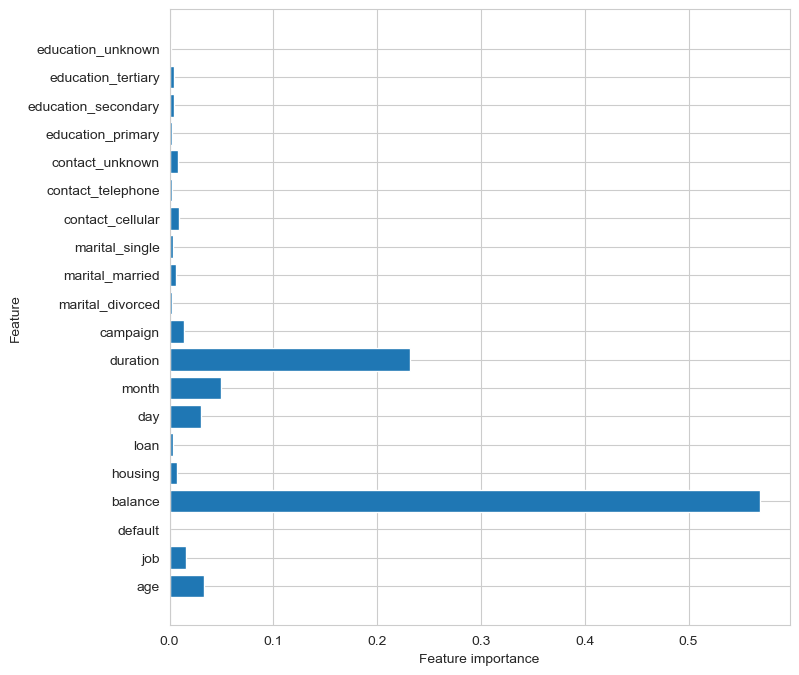

In [68]:
y,training_set=split_data(undersampled_dataframe)

cv_estimator = RandomForestClassifier(random_state =42)
X_train,X_test,Y_train,Y_test = train_test_split(training_set, y, test_size=0.3, random_state=42)
cv_estimator.fit(X_train, Y_train)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(X_train, Y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, X_train.columns):
    if bool:
        rfecv_features.append(feature)
print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

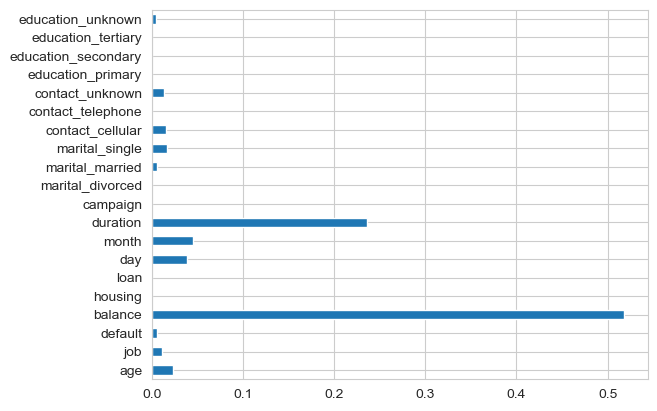

In [69]:
y,training_set=split_data(undersampled_dataframe)


importances = mutual_info_classif(training_set,y)
feature = pd.Series(importances, training_set.columns)
feature.plot(kind = 'barh')
plt.show()


In [70]:
# Select the features for building models

data_for_training = undersampled_dataframe.drop(['education_unknown','education_tertiary','education_primary','campaign','loan','housing','default'], axis=1)
data_for_testing = oversampled_dataframe.drop(['education_unknown','education_tertiary','education_primary','campaign','loan','housing','default'], axis=1)
data_for_training.shape
data_for_testing.head()

,y,age,job,balance,day,month,duration,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,education_secondary
0,0,58,1,2143,5,5,261,0,1,0,0,0,1,0
1,0,44,2,29,5,5,151,0,0,1,0,0,1,1
2,0,33,3,2,5,5,76,0,1,0,0,0,1,1
3,0,47,4,1506,5,5,92,0,1,0,0,0,1,0
4,0,33,0,1,5,5,198,0,0,1,0,0,1,0


In [80]:
# Data partitioning for building model and later validation

y, training_set = split_data(data_for_training)
y_test1, X_test1 = split_data(data_for_testing)
X_train, X_test, y_train, y_test=train_test_split(training_set, y, test_size=0.30)

## Classification Model

In [81]:
#Apply Logistic Regression

classifier_l=LogisticRegression()
classifier_l.fit(X_train, y_train)
y_pred = classifier_l.predict(X_test)
y_pred_oversample = classifier_l.predict(X_test1)

#Calculate accuracy and F1 score

result_logistic_reg = accuracy_score(y_test,y_pred)
accuracy_log = accuracy_score(y_test1,y_pred_oversample)
f1_score_log=f1_score(y_test1,y_pred_oversample)

C:\Users\Tanushri Bhaduri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
#Apply K Nearest Neighbour Algorithm

classifier_k = KNeighborsClassifier(n_neighbors=5)
classifier_k.fit(X_train, y_train)
y_pred = classifier_k.predict(X_test)
y_pred_oversample = classifier_k.predict(X_test1)
#Calculate accuracy and F1 score

result_knn = accuracy_score(y_test,y_pred)
accuracy_KNN=accuracy_score(y_test1,y_pred_oversample)
f1_score_KNN=f1_score(y_test1,y_pred_oversample)

C:\Users\Tanushri Bhaduri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tanushri Bhaduri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [83]:
# Apply SVM

classifier_s = SVC(kernel='linear')
classifier_s.fit(X_train,y_train)
y_pred = classifier_s.predict(X_test)
y_pred_oversample = classifier_s.predict(X_test1)

#Calculate accuracy and F1 score

result_svm = accuracy_score(y_test,y_pred)
accuracy_SVM=accuracy_score(y_test1,y_pred_oversample)
f1_score_SVM=f1_score(y_test1,y_pred_oversample)

In [84]:
classifier_d = DecisionTreeClassifier()
classifier_d.fit(X_train,y_train)
y_pred = classifier_d.predict(X_test)
y_pred_oversample = classifier_d.predict(X_test1)
#Calculate accuracy and F1 score

result_Dec_tree = accuracy_score(y_test,y_pred)
accuracy_DC=accuracy_score(y_test1,y_pred_oversample)
f1_score_DC=f1_score(y_test1,y_pred_oversample)

In [85]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_oversample = model.predict(X_test1)

#Calculate accuracy and F1 score

result_Adaboost = accuracy_score(y_test,y_pred)
accuracy_ADA=accuracy_score(y_test1,y_pred_oversample)
f1_score_ADA=f1_score(y_test1,y_pred_oversample)

In [86]:
# Apply Xgboost Classifier

classifier = xgb.XGBClassifier(n_estimators = 100, learning_rate = 5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred_oversample = classifier.predict(X_test1)

#Calculate accuracy and F1 score

result_xgb = accuracy_score(y_test,y_pred)
accuracy_XGB=accuracy_score(y_test1,y_pred_oversample)
f1_score_XGB=f1_score(y_test1,y_pred_oversample)

In [87]:
print("Accuracy of Logistic Regression:",accuracy_log)
print("Accuracy of KNN Classifier:",accuracy_KNN)
print("Accuracy of SVM Classifier:",accuracy_SVM)
print("Accuracy of Decision Tree Classifier:",accuracy_DC)
print("Accuracy of ADA Boost Classifier:",accuracy_ADA)
print("Accuracy of XGBoost Classifier:",accuracy_XGB)

Accuracy of Logistic Regression: 0.5701811125485123
Accuracy of KNN Classifier: 0.5024795170332039
Accuracy of SVM Classifier: 0.5649390901250539
Accuracy of Decision Tree Classifier: 0.5136508193186718
Accuracy of ADA Boost Classifier: 0.5098237386804657
Accuracy of XGBoost Classifier: 0.795022100043122


In [88]:
print("F1 score of Logistic Regression:",f1_score_log)
print("F1 score of KNN:",f1_score_KNN)
print("F1 score of SVM:",f1_score_SVM)
print("F1 score of Decision Tree:",f1_score_DC)
print("F1 score of ADA Boost Classifier:",f1_score_ADA)
print("F1 score of XGBoost Classifier:",f1_score_XGB)

F1 score of Logistic Regression: 0.6811611587596712
F1 score of KNN: 0.650093826411661
F1 score of SVM: 0.6746414858559494
F1 score of Decision Tree: 0.6613304306211115
F1 score of ADA Boost Classifier: 0.6564734103336576
F1 score of XGBoost Classifier: 0.7861430961519537


## Conclusion

As per the need of the company, we build the classification model which can identify weather user will be interested to invest in term deposit or not. Out of six different models, XG Boost showed the best performance with 0.78 